In [142]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm.notebook import tqdm

import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

In [2]:
df = pd.read_csv("dataset/captions.txt")

In [3]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [85]:
img_list = df["image"].unique()

In [87]:
image_arr = np.asarray(Image.open("dataset/Images/" + df.image[0]))

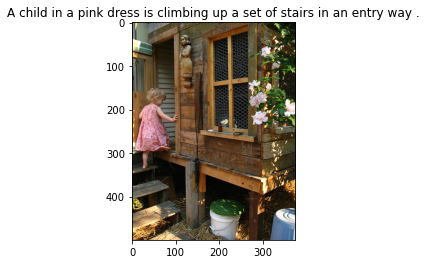

In [88]:
plt.title(df.caption[0])
plt.imshow(image_arr)

In [ ]:
def show_image(img, cap=None):
    if cap:
        plt.title(cap)
    plt.imshow(img)

In [126]:
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, path, transform=None):
        self.img_list = img_list
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.img_list)
        
    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        img = Image.open(self.path + img_path)
        
        if self.transform:
            img = self.transform(img)
            
        return img, img_path

In [111]:
inception = timm.create_model('inception_v4', pretrained=True, num_classes=0, global_pool='')
inception.eval()

InceptionV4(
  (features): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (3): Mixed3a(
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv): BasicConv2d(
        (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, mom

In [112]:
config = resolve_data_config({}, model=inception)
transform = create_transform(**config)

In [131]:
dataset = ImageDataset(img_list, "dataset/Images/", transform=transform)
print(len(dataset))

8091


In [132]:
dataiter = iter(dataset)

In [133]:
img, path = next(dataiter)

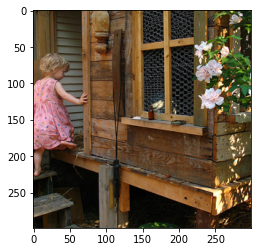

In [136]:
disp_img = np.squeeze(img.numpy())
disp_img = (disp_img - np.min(disp_img)) / (np.max(disp_img) - np.min(disp_img))
show_image(np.transpose(disp_img, (1, 2, 0)))

In [137]:
with torch.no_grad():
    outs = inception(img.unsqueeze(0))
print(outs.shape)

torch.Size([1, 1536, 8, 8])


In [138]:
imageloader = torch.utils.data.DataLoader(dataset)

In [143]:
count = 0
for img, img_path in tqdm(imageloader):
    count += 1
print(count)

  0%|          | 0/8091 [00:00<?, ?it/s]

8091
